In [1]:
from automata.fa.dfa import DFA
from automata.fa.nfa import NFA
from visual_automata.fa.dfa import VisualDFA
from visual_automata.fa.nfa import VisualNFA
import json
from collections import OrderedDict

In [83]:


jsdata={
    "states":4,
    "letters":["0","1"],
    "t_func":[['A',"0",['A','B']],['A',"1",['A','D']],['B',"1",['C']]],
    "start":'A',
    "final":['A','C']
}
data=json.loads(json.dumps(jsdata),object_pairs_hook=OrderedDict)

dfa_states = 2 ** data["states"]
dfa_letters = data["letters"]
dfa_start = data["start"]
dfa_t_func = []
dfa_final = []
dfa_list = []
q = []

q.append((dfa_start,))

nfa_transitions = {}
dfa_transitions = {}

for transition in data["t_func"]:
    nfa_transitions[(transition[0], transition[1])] = transition[2]

for in_state in q:
    for symbol in dfa_letters:
        if len(in_state) == 1 and (in_state[0], symbol) in nfa_transitions:
            dfa_transitions[(in_state, symbol)] = nfa_transitions[(in_state[0], symbol)]

            if tuple(dfa_transitions[(in_state, symbol)]) not in q:
                q.append(tuple(dfa_transitions[(in_state, symbol)]))
        else:
            dest = []
            f_dest =[]

            for n_state in in_state:
                if (n_state, symbol) in nfa_transitions and nfa_transitions[(n_state, symbol)] not in dest:
                    dest.append(nfa_transitions[(n_state, symbol)])
            
            if dest:
                for d in dest:
                    for value in d:
                        if value not in f_dest:
                            f_dest.append(value)
            
                dfa_transitions[(in_state, symbol)] = f_dest 

                if tuple(f_dest) not in q: 
                    q.append(tuple(f_dest))

for key, value in dfa_transitions.items():
    temp_list = [[key[0], key[1], value]]
    dfa_t_func.extend(temp_list)


for q_state in q:
    for f_state in data["final"]:
        if f_state in q_state:
            dfa_final.append(q_state)

dfa = OrderedDict()
dfa["states"] = dfa_states
dfa["letters"] = dfa_letters
dfa["t_func"] = dfa_t_func
dfa["start"] = dfa_start
dfa["final"] = dfa_final

#output_file = open('output2.json', 'w+')
#print(json.dumps(dfa, indent=4))
dfa_states=[]
for i in range(dfa["states"]):
   dfa_states.append(i)
#json.dump(dfa, output_file, separators = (',\t' , ':'))     
print(dfa)

OrderedDict([('states', 8), ('letters', ['0', '1']), ('t_func', [[('A',), '0', ['A', 'B']], [('A',), '1', ['A']], [('A', 'B'), '0', ['A', 'B']], [('A', 'B'), '1', ['A', 'C']], [('A', 'C'), '0', ['A', 'B']], [('A', 'C'), '1', ['A']]]), ('start', 'A'), ('final', [('A',), ('A', 'B'), ('A', 'C'), ('A', 'C')])])


In [10]:
def unique(list1):
 
    # initialize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    return unique_list

In [91]:
tr1=[]
states=[]

for i in range(len(dfa["t_func"])):
    tr1.append(dfa["t_func"][i][0])

states=unique(tr1)


t={}
for i in range(len(states)):
    key=str(states[i])
    key=key.replace(",","")
    key=key.replace("'","")
    key=key.replace(" ","")
    key=key.replace("(","")
    key=key.replace(")","")


    t[key]={}


for i in range(len(dfa["t_func"])):
    for k in range(len(states)):
        if dfa["t_func"][i][0]==states[k]:
            print(dfa["t_func"][i][0],dfa["t_func"][i][1],dfa["t_func"][i][2])
            key=str(dfa["t_func"][i][0])
            key=key.replace(",","")
            key=key.replace("'","")
            key=key.replace(" ","")
            key=key.replace("(","")
            key=key.replace(")","")
            subkey=str(dfa["t_func"][i][1])
            subkey=subkey.replace(",","")
            subkey=subkey.replace("'","")
            subkey=subkey.replace(" ","")
            subkey=subkey.replace("(","")
            subkey=subkey.replace(")","")
            subkey=subkey.replace("[","")
            subkey=subkey.replace("]","")
            value=str(dfa["t_func"][i][2])
            value=value.replace(",","")
            value=value.replace("'","")
            value=value.replace(" ","")
            value=value.replace("(","")
            value=value.replace(")","")
            value=value.replace("[","")
            value=value.replace("]","")
            t[key].update({subkey:value})
    


for i in range(len(states)):
    states[i]=str(states[i])
    states[i]=states[i].replace(",","")
    states[i]=states[i].replace("'","")
    states[i]=states[i].replace(" ","")
    states[i]=states[i].replace("(","")
    states[i]=states[i].replace(")","")

states=set(states)
letters=set(dfa["letters"])
dfa_start=str(dfa["start"])


dfa_end=[]
for i in range(len(dfa["final"])):
    end=str(dfa["final"][i])
    end=end.replace(",","")
    end=end.replace("'","")
    end=end.replace(" ","")
    end=end.replace("(","")
    end=end.replace(")","")
    dfa_end.append(end)
dfa_end=set(dfa_end)
print(dfa_end)





TypeError: 'VisualDFA' object is not subscriptable

In [89]:
dfa = VisualDFA(
    states=states,
    input_symbols=letters,
    transitions=t,
    initial_state=dfa_start,
    final_states=dfa_end,
)

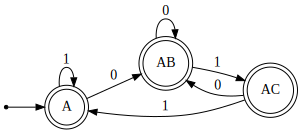

In [90]:
dfa.show_diagram()